In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [71]:
df =  pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


inspection of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [17]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df.duplicated().sum()

np.int64(0)

In [21]:
df['customerID'].duplicated().sum()

np.int64(0)

In [72]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [73]:
df['SeniorCitizen']

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

Text(0.5, 1.0, 'count of customers by churn')

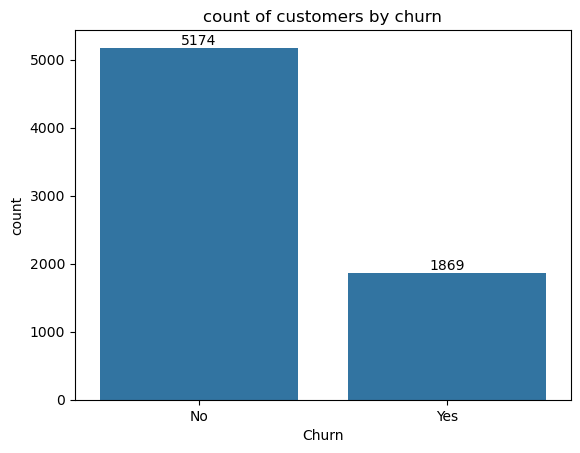

In [74]:
ax = sns.countplot(x = df['Churn'], data= df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")


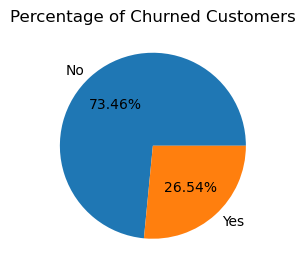

In [75]:
plt.figure(figsize= (3,4))

gb = df.groupby('Churn').agg({'Churn':"count"})

plt.pie(gb['Churn'], labels= gb.index, autopct= '%1.2f%%')
plt.title("Percentage of Churned Customers")
plt.show()

from the given pie chart we can conclude that 26.54% of our customers have churned out.


not let's explore the reason behind it

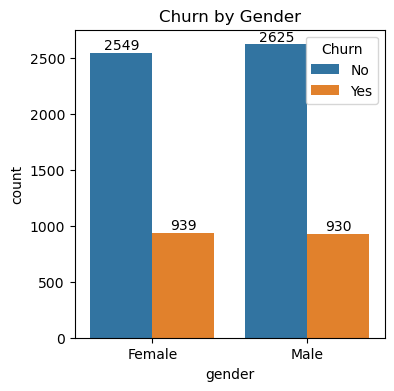

In [76]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x='gender', data=df, hue='Churn')
plt.title("Churn by Gender")

# add labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()





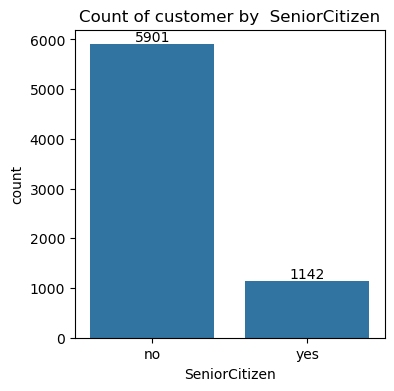

In [83]:
plt.figure(figsize=(4,4))
axx = sns.countplot(x='SeniorCitizen', data=df)
axx.bar_label(axx.containers[0])

plt.title("Count of customer by  SeniorCitizen")
plt.show()

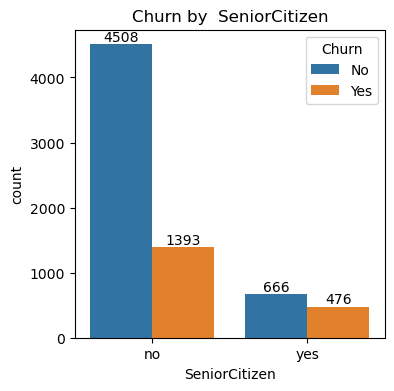

In [78]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title("Churn by  SeniorCitizen")

# add labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

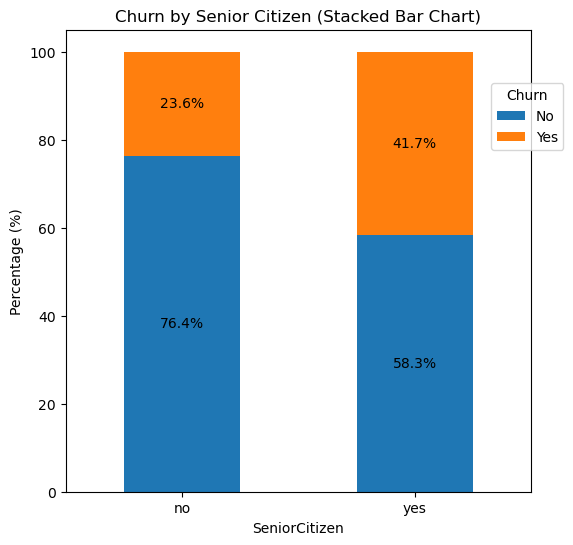

In [82]:

total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

comparative a greater pecentage of people in senior citizen category have churned


<Axes: xlabel='tenure', ylabel='Count'>

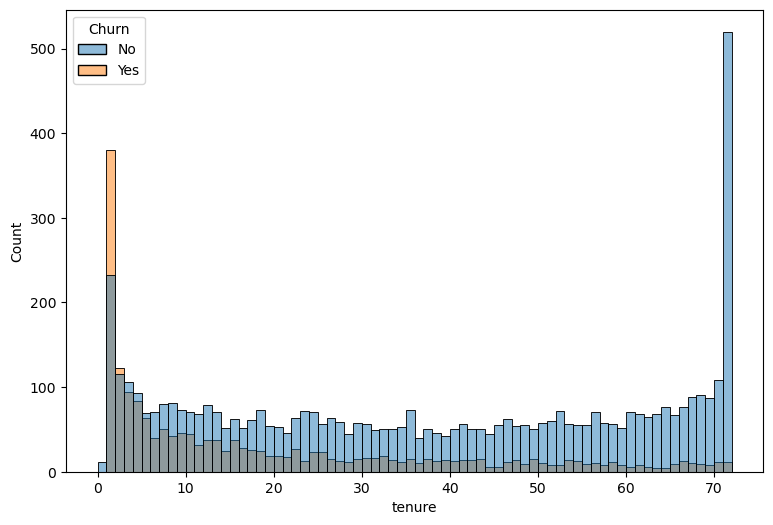

In [86]:
plt.figure(figsize=(9,6))
sns.histplot(x = 'tenure', data= df ,bins = 72, hue = 'Churn')

people who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned

In [87]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

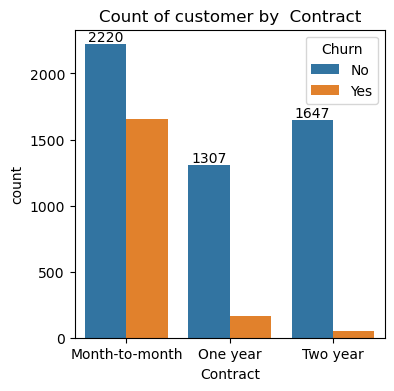

In [89]:
plt.figure(figsize=(4,4))
axx = sns.countplot(x='Contract', data=df, hue= "Churn")
axx.bar_label(axx.containers[0])

plt.title("Count of customer by  Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

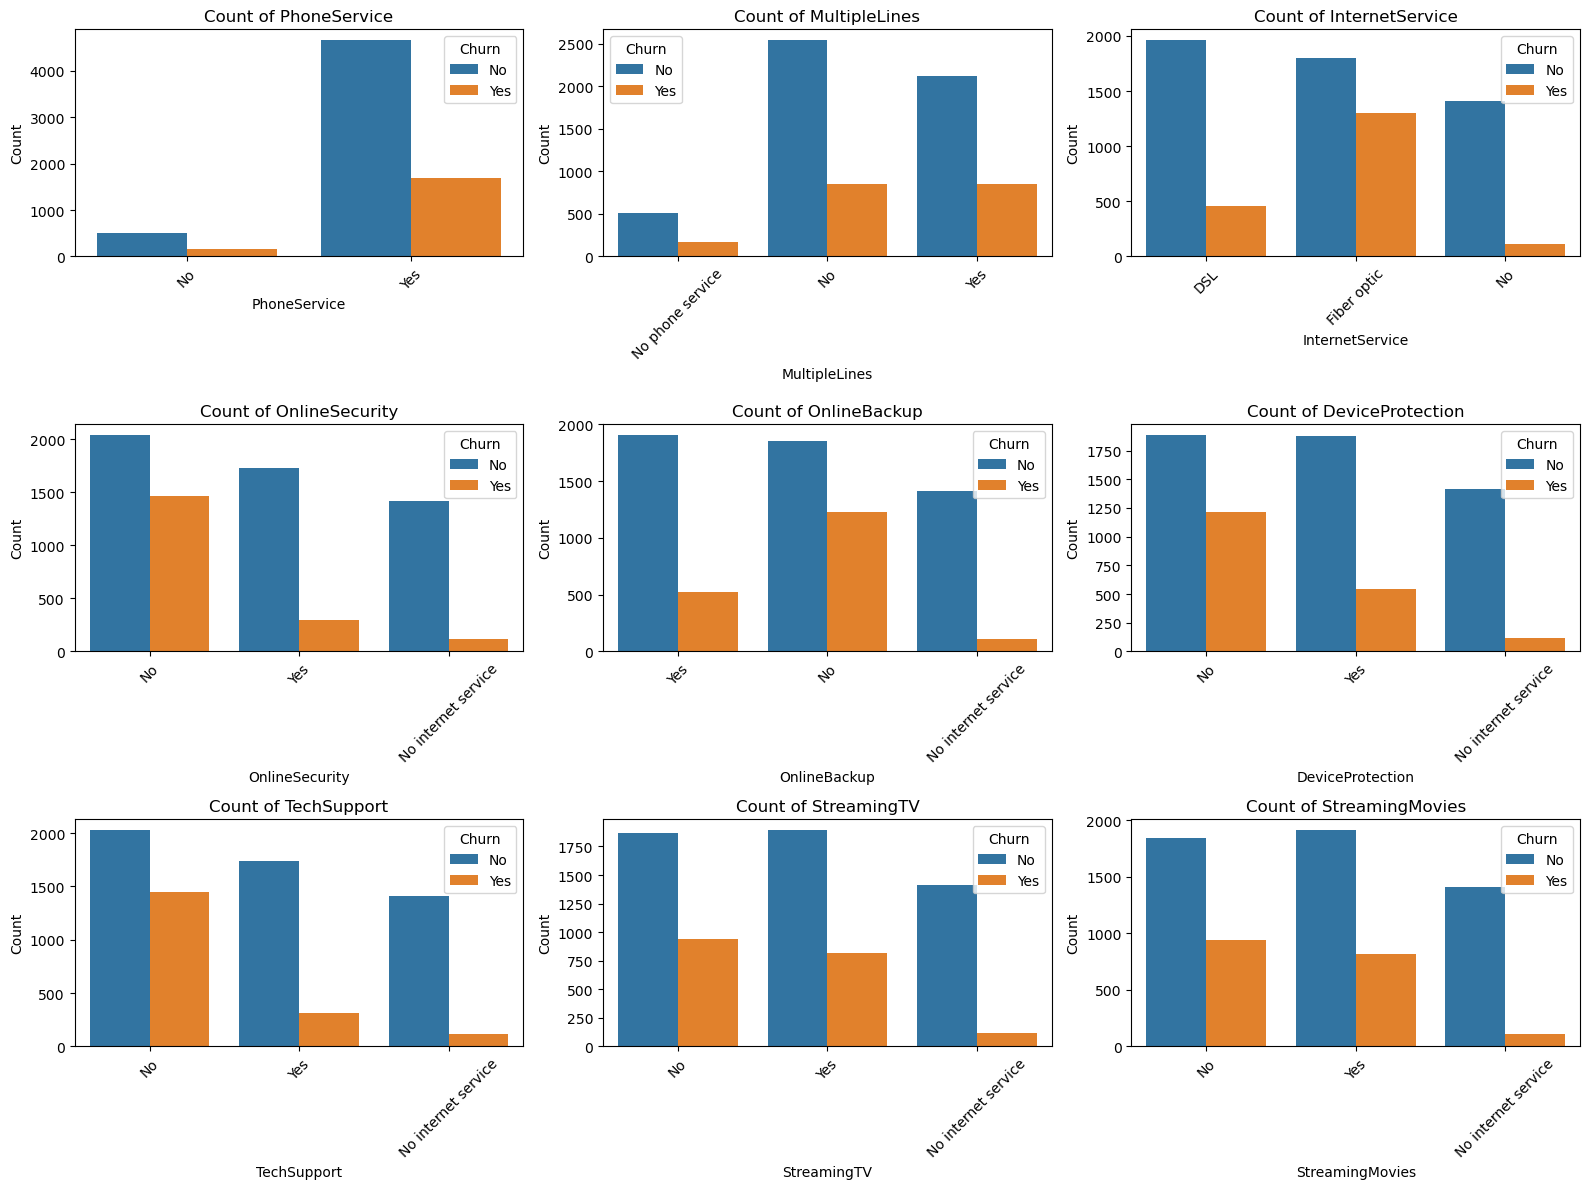

In [92]:

# List of columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# OPTIONAL: handle missing values (very important)
df[cols] = df[cols].fillna('No')

# Create figure
plt.figure(figsize=(16, 12))

# Loop through columns and create count plots
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)   # 3 rows, 3 columns
    sns.countplot(x=col, data=df, hue = df['Churn'])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


The majority of customers who do not churn tend to have services like PhoneService,
InternetService (particularly DSL), 
and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, 
churn rates are noticeably higher when these services are not used or are unavailable.

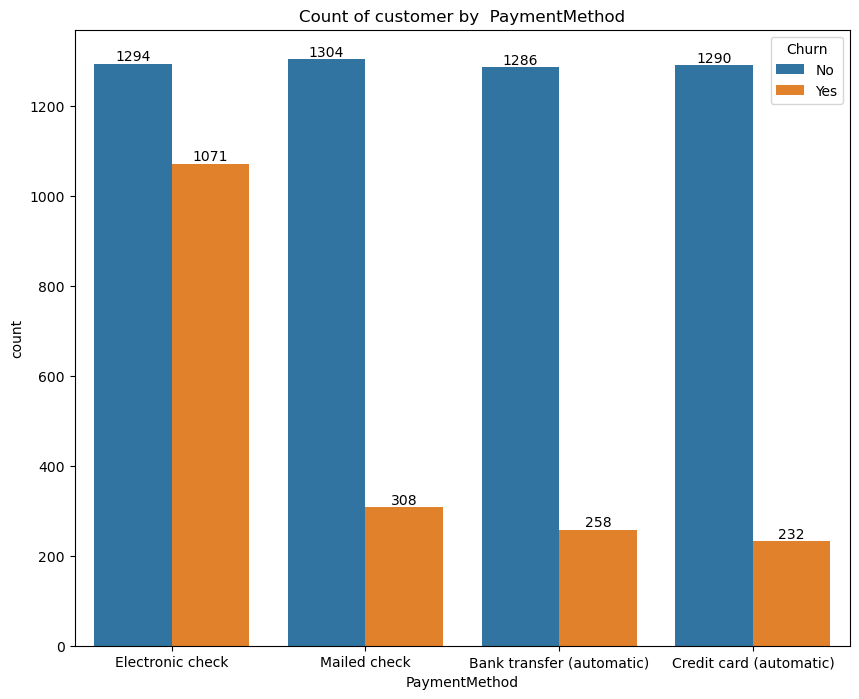

In [97]:
plt.figure(figsize=(10,8))
axx = sns.countplot(x='PaymentMethod', data=df, hue= "Churn")
axx.bar_label(axx.containers[0])
axx.bar_label(axx.containers[1])

plt.title("Count of customer by  PaymentMethod")
plt.show()

customer is likely to churn when he is using electronic check as a payment method.